In [99]:
import csv
from datetime import datetime
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [100]:
time = []
gdp = []
with open("res/GDP.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        time.append(datetime.strptime(row['DATE'], "%Y-%m-%d"))
        gdp.append(float(row['GDP']))

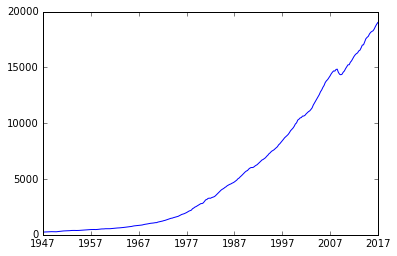

In [101]:
plt.plot(time, gdp)
plt.show()

In [139]:
hp = sm.tsa.filters.hpfilter
noise, signal = hp(gdp)
origin = time[0]
x = [(date-origin).total_seconds()/1e9 for date in time]

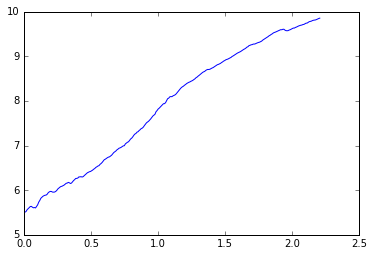

In [146]:
plt.plot(x, np.log(gdp))
plt.show()

In [211]:
cfit = scipy.optimize.curve_fit
mask = 132
print(time[mask])
curve = cfit(lambda t,a,b,c: a*numpy.exp(b*t)+c,  x[:mask], np.log(gdp)[:mask])
print(curve)
yhat = curve[0][0]*numpy.exp(curve[0][1]*numpy.asarray(x))+curve[0][2]

1980-01-01 00:00:00
(array([ 1.67861026,  0.83224294,  3.90880314]), array([[ 0.01414985, -0.00471547, -0.01502126],
       [-0.00471547,  0.00158011,  0.00499222],
       [-0.01502126,  0.00499222,  0.01597987]]))


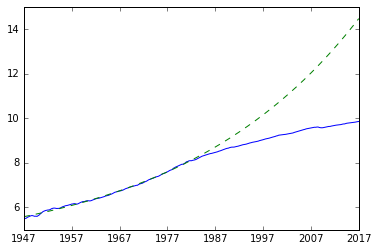

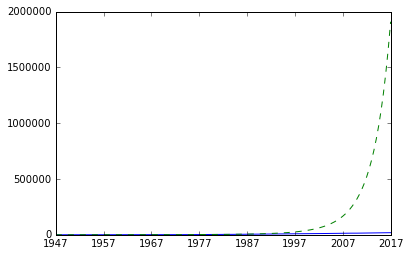

In [212]:
plt.plot(time, np.log(gdp))
plt.plot(time, yhat,'--')
plt.show()
plt.plot(time, np.exp(np.log(gdp)))
plt.plot(time, np.exp(yhat), '--')
plt.show()

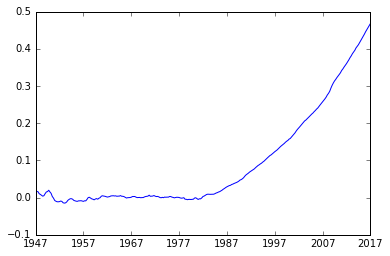

In [213]:
plt.plot(time, (yhat-np.log(gdp))/np.log(gdp))
plt.show()

In [216]:
mask = 132
print(time[mask])
curve = cfit(lambda t,a,b,c: a*numpy.exp(b*t)+c,  x[:mask], gdp[:mask])
print(curve)
yhat = curve[0][0]*numpy.exp(curve[0][1]*numpy.asarray(x))+curve[0][2]

1980-01-01 00:00:00
(array([  61.15559191,    3.56361445,  246.14819585]), array([[  6.21448955e+00,  -9.87478155e-02,  -1.57588435e+01],
       [ -9.87478155e-02,   1.58503981e-03,   2.42316496e-01],
       [ -1.57588435e+01,   2.42316496e-01,   5.07271649e+01]]))


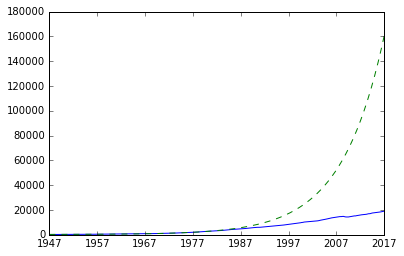

In [217]:
plt.plot(time, gdp)
plt.plot(time, yhat,'--')
plt.show()

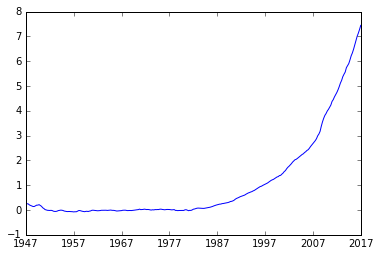

In [218]:
plt.plot(time, (yhat-gdp)/gdp)
plt.show()